#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-cp37-none-any.whl size=8595 sha256=9616406a61faad3939fdb42d9181cacf8ac23ca33631deded7d678e432f3b99d
  Stored in directory: /root/.cache/pip/wheels/de/a0/08/5234d6b02b29c561f62b6c985e2eb7d480fb0b92359a8c74e4
Successfully built MiniSom


## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


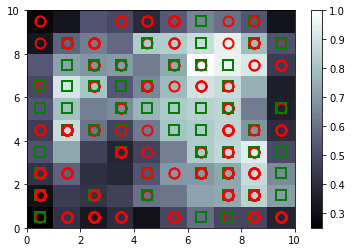

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [7]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,7)], mappings[(8,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraud Clients

In [8]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15692137
15573520
15676909
15609356
15588123
15572390
15575243
15663194
15631693
15586174
15646563


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [9]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [10]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [12]:
import tensorflow as tf
tf.__version__

'2.5.0'

## Initializing the ANN

In [13]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu', input_dim=15))

## Adding the output layer

In [16]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [17]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [26]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 1ms/step - loss: 0.2561 - accuracy: 0.9841
Epoch 2/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1919 - accuracy: 0.9841
Epoch 3/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1530 - accuracy: 0.9841
Epoch 4/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1288 - accuracy: 0.9841
Epoch 5/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1134 - accuracy: 0.9841
Epoch 6/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1035 - accuracy: 0.9841
Epoch 7/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0970 - accuracy: 0.9841
Epoch 8/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0928 - accuracy: 0.9841
Epoch 9/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0899 - accuracy: 0.9841
Epoch 10/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0878 - accuracy: 0.9841

## Predicting test set results

In [30]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [31]:
print(y_pred)

[[1.57761560e+07 3.20280492e-02]
 [1.56273650e+07 3.20280492e-02]
 [1.57484990e+07 3.20280492e-02]
 ...
 [1.56999630e+07 3.20280492e-02]
 [1.57933660e+07 3.20280492e-02]
 [1.55924120e+07 3.20280492e-02]]


In [33]:
print('Fraud Customer IDs & Probabilities')
for i in range(len(y_pred)):
  print(i, y_pred[i])

Fraud Customer IDs & Probabilities
0 [1.57761560e+07 3.20280492e-02]
1 [1.56273650e+07 3.20280492e-02]
2 [1.57484990e+07 3.20280492e-02]
3 [1.55986140e+07 3.20280492e-02]
4 [1.56688890e+07 3.20280492e-02]
5 [1.58000490e+07 3.20280492e-02]
6 [1.55837240e+07 3.20280492e-02]
7 [1.56220830e+07 3.20280492e-02]
8 [1.56455710e+07 3.20280492e-02]
9 [1.55982660e+07 3.20280492e-02]
10 [1.56679340e+07 3.20280492e-02]
11 [1.55696820e+07 3.20280492e-02]
12 [1.57729410e+07 3.20280492e-02]
13 [1.55861740e+07 3.20280492e-02]
14 [1.58036820e+07 3.20280492e-02]
15 [1.56273280e+07 3.20280492e-02]
16 [1.57170650e+07 3.20280492e-02]
17 [1.56024560e+07 3.20280492e-02]
18 [1.57025710e+07 3.20280492e-02]
19 [1.56365620e+07 3.20280492e-02]
20 [1.56739070e+07 3.20280492e-02]
21 [1.56798010e+07 3.20280492e-02]
22 [1.57610470e+07 3.20280492e-02]
23 [1.56712930e+07 3.20280492e-02]
24 [1.56875270e+07 3.20280492e-02]
25 [1.56478980e+07 3.20280492e-02]
26 [1.56715340e+07 3.20280492e-02]
27 [1.55912480e+07 3.20280492e